In [1]:
%load_ext autoreload
%autoreload 2

from libpysal import examples
from esda import correlogram

import geopandas as gpd

In [2]:
sac = gpd.read_file(examples.load_example("Sacramento1").get_path("sacramentot2.shp"))

Example not available: Sacramento1
Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


In [3]:
sac = sac.to_crs(sac.estimate_utm_crs())  # now in meters)

In [4]:
distances = [i+500 for i in range(0,5000, 500)]

In [5]:
distances

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

In [6]:
correlogram?

Signature:
correlogram(
    gdf: geopandas.geodataframe.GeoDataFrame,
    variable: str,
    distances: list,
    distance_type: str = 'band',
    statistic: str = 'I',
    weights_kwargs: dict = None,
    stat_kwargs: dict = None,
    n_jobs: int = -1,
    backend: str = 'loky',
)
Docstring:
Generate a spatial correlogram

Parameters
----------
gdf : gpd.GeoDataFrame
    geodataframe holding spatial and attribute data
variable: str
    column on the geodataframe used to compute autocorrelation statistic
distances : list
    list of distances to compute the autocorrelation statistic
distance_type : str, optional
    which concept of distance to increment. Options are {`band`, `knn`}.
    by default 'band' (for `libpysal.weights.DistanceBand` weights)
statistic : str, by default 'I'
    which spatial autocorrelation statistic to compute. Options in {`I`, `G`, `C`}
weights_kwargs : dict
    additional keyword arguments passed to the libpysal.weights.W class
stat_kwargs : dict
    additio

## Distance Bands

In [7]:
corr = correlogram(sac, 'HH_INC', distances)

Corr is a dataframe of autocorrelation statistics indexed by distance

In [8]:
corr

,z2ss,EI,VI_norm,seI_norm,VI_rand,seI_rand,I,z_norm,z_rand,p_norm,p_rand,p_sim,EI_sim,seI_sim,VI_sim,z_sim,p_z_sim
500,1.260604e+11,-0.002488,0.497534,0.705361,0.496239,0.704442,0.058227,0.086076,0.086188,9.314058e-01,9.313166e-01,0.432,-0.019314,0.684636,0.468726,0.113260,4.549124e-01
1000,1.260604e+11,-0.002488,0.014259,0.119409,0.014221,0.119254,0.492069,4.141686,4.147088,3.447621e-05,3.367309e-05,0.001,0.000039,0.116576,0.013590,4.220684,1.217809e-05
1500,1.260604e+11,-0.002488,0.004586,0.067719,0.004574,0.067631,0.454942,6.754808,6.763620,1.430242e-11,1.345857e-11,0.001,-0.002112,0.068621,0.004709,6.660595,1.363609e-11
2000,1.260604e+11,-0.002488,0.002164,0.046515,0.002158,0.046454,0.562591,12.148448,12.164298,5.846476e-34,4.815656e-34,0.001,-0.003413,0.045444,0.002065,12.455123,6.557497e-36
2500,1.260604e+11,-0.002488,0.001481,0.038483,0.001477,0.038433,0.501091,13.085698,13.102771,3.974924e-39,3.174519e-39,0.001,-0.001798,0.037570,0.001412,13.385278,3.686049e-41
3000,1.260604e+11,-0.002488,0.001158,0.034025,0.001155,0.033981,0.510100,15.064984,15.084639,2.752332e-51,2.043904e-51,0.001,-0.001951,0.034226,0.001171,14.960840,6.617265e-51
3500,1.260604e+11,-0.002488,0.000900,0.029994,0.000897,0.029955,0.512046,17.154529,17.176892,5.813950e-66,3.955413e-66,0.001,-0.003033,0.029970,0.000898,17.186530,1.674951e-66
4000,1.260604e+11,-0.002488,0.000755,0.027479,0.000753,0.027443,0.465386,17.026869,17.049056,5.190784e-65,3.552242e-65,0.001,-0.002835,0.027139,0.000737,17.252622,5.346716e-67
4500,1.260604e+11,-0.002488,0.000738,0.027175,0.000737,0.027140,0.463040,17.130555,17.152901,8.781368e-66,5.979201e-66,0.001,-0.001066,0.027226,0.000741,17.046113,1.867826e-65
5000,1.260604e+11,-0.002488,0.000676,0.026007,0.000675,0.025973,0.428984,16.590555,16.612199,8.156288e-62,5.686988e-62,0.001,-0.003013,0.027445,0.000753,15.740544,3.987723e-56


<AxesSubplot:>

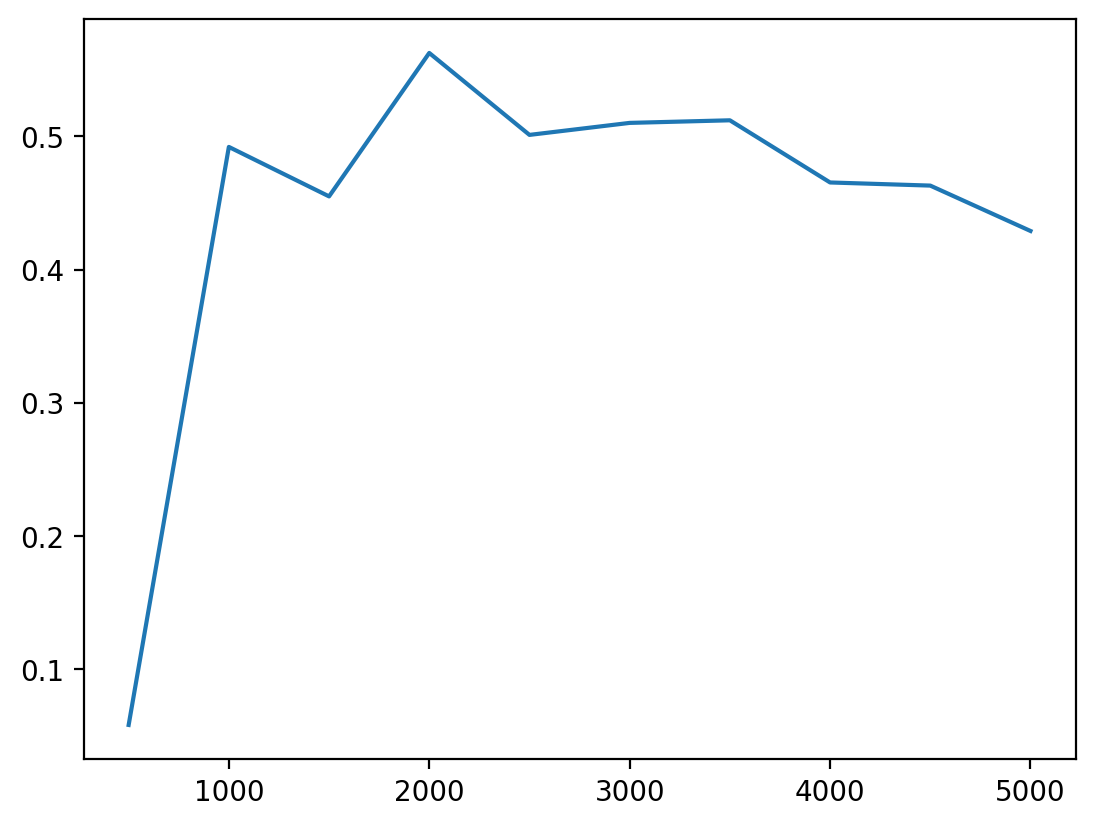

In [9]:
corr.I.plot()

In [10]:
corr = correlogram(sac, 'HH_INC', distances, statistic='C')

<AxesSubplot:>

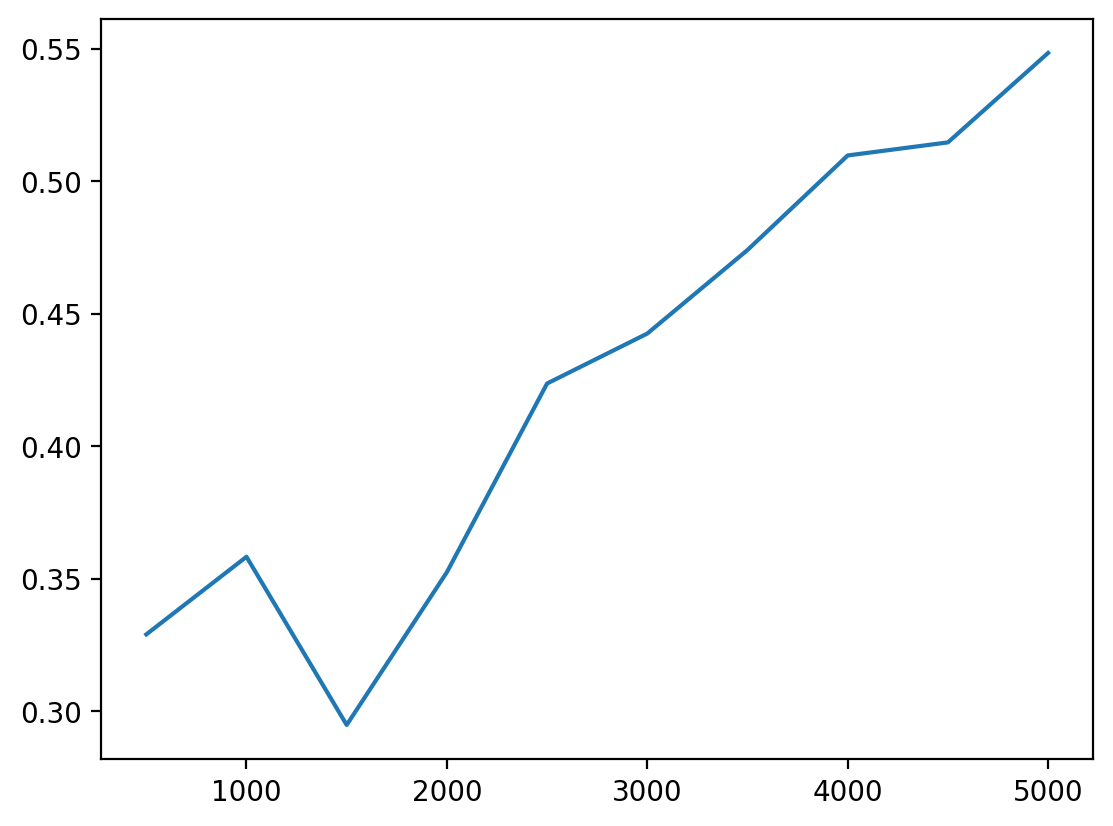

In [11]:
corr.C.plot()

In [12]:
corr = correlogram(sac, 'HH_INC', distances, statistic='G')

/Users/knaaptime/Dropbox/projects/esda/esda/getisord.py:168: RuntimeWarning: overflow encountered in long_scalars
  EG2 = b0 * (sum(y2) ** 2) + b1 * sum(y4) + b2 * (sum(y) ** 2) * sum(y2)
/Users/knaaptime/Dropbox/projects/esda/esda/getisord.py:171: RuntimeWarning: overflow encountered in long_scalars
  EG2DEN = ((sum(y) ** 2 - sum(y2)) ** 2) * n * (n - 1) * (n - 2) * (n - 3)
/Users/knaaptime/Dropbox/projects/esda/esda/getisord.py:168: RuntimeWarning: overflow encountered in long_scalars
  EG2 = b0 * (sum(y2) ** 2) + b1 * sum(y4) + b2 * (sum(y) ** 2) * sum(y2)
/Users/knaaptime/Dropbox/projects/esda/esda/getisord.py:171: RuntimeWarning: overflow encountered in long_scalars
  EG2DEN = ((sum(y) ** 2 - sum(y2)) ** 2) * n * (n - 1) * (n - 2) * (n - 3)
/Users/knaaptime/Dropbox/projects/esda/esda/getisord.py:126: RuntimeWarning: invalid value encountered in sqrt
  self.z_norm = (self.G - self.EG) / np.sqrt(self.VG)
/Users/knaaptime/Dropbox/projects/esda/esda/getisord.py:168: RuntimeWarning: ov

<AxesSubplot:>

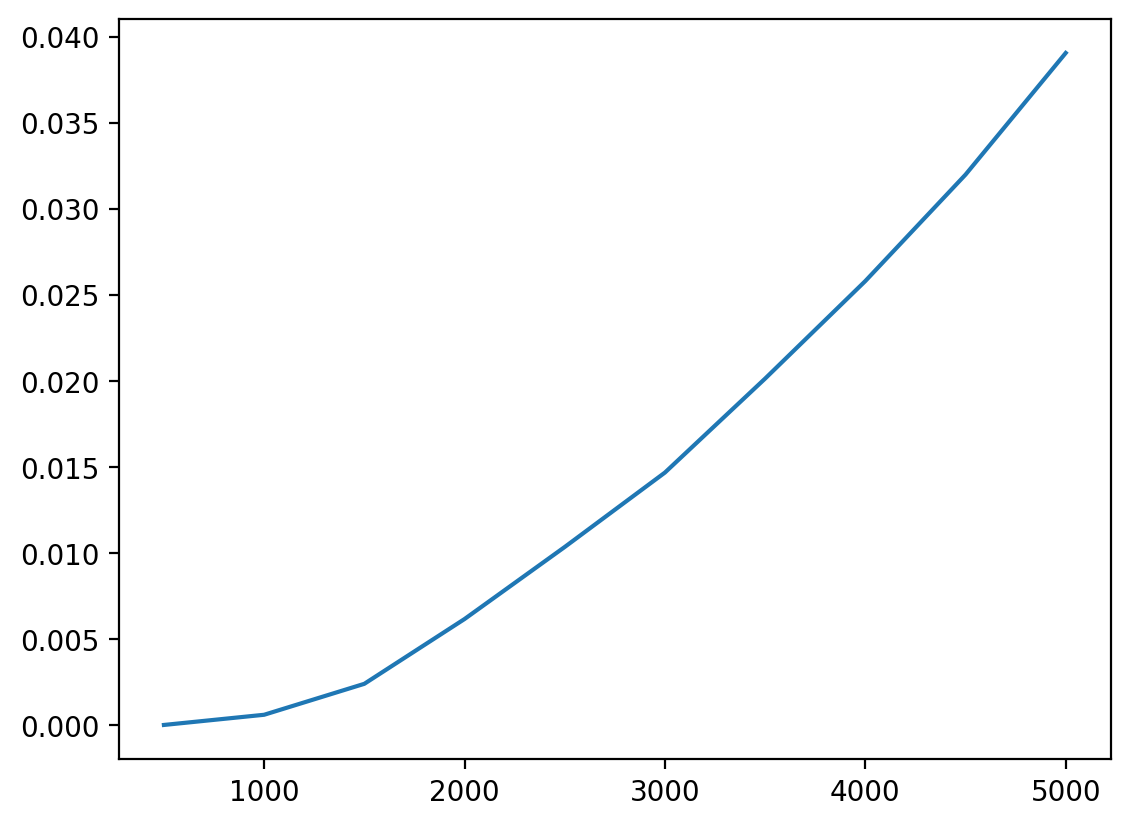

In [13]:
corr.G.plot()

## KNN Distance

In [14]:
kdists = list(range(1,50))

In [15]:
kcorr = correlogram(sac, "HH_INC", kdists, distance_type='knn')

<AxesSubplot:>

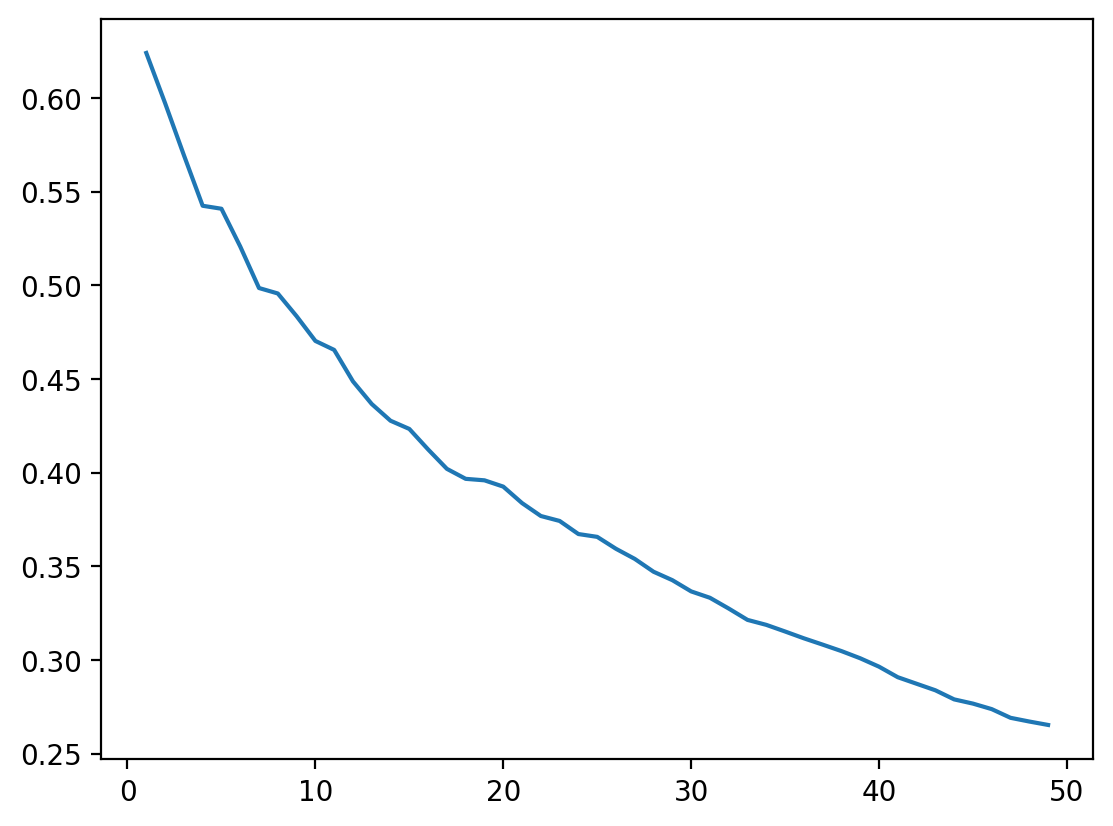

In [16]:
kcorr.I.plot()